importing all the neccessary modules

In [318]:
from collections import Counter

In [319]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

importing 'heart.csv' dataset

In [320]:
# loading the csv data to a pandas dataframe
filename='heart.csv'

heart_data=pd.read_csv(filename)

details about the dataset

In [321]:
# print first 5 rows
heart_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [322]:
# how many rows and columns in the dataset
rows,columns=heart_data.shape #It gives a tuple. So, I just unpacked the tuple.
print("Number of Rows : ",rows)
print("Number of Columns : ",columns)

Number of Rows :  4238
Number of Columns :  16


In [323]:
# what are the columns in the dataset
heart_data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [324]:
# how many data points in the dataset are non-diseased [0] and diseased [1] data points
Counter(heart_data["TenYearCHD"])

Counter({0: 3594, 1: 644})

In [325]:
# more information about the dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [326]:
# changing the name of "male" column into "sex" column
heart_data.rename(columns={"male":"sex"},inplace=True)

In [327]:
# list of columns in the dataset
clist=list(heart_data.columns)

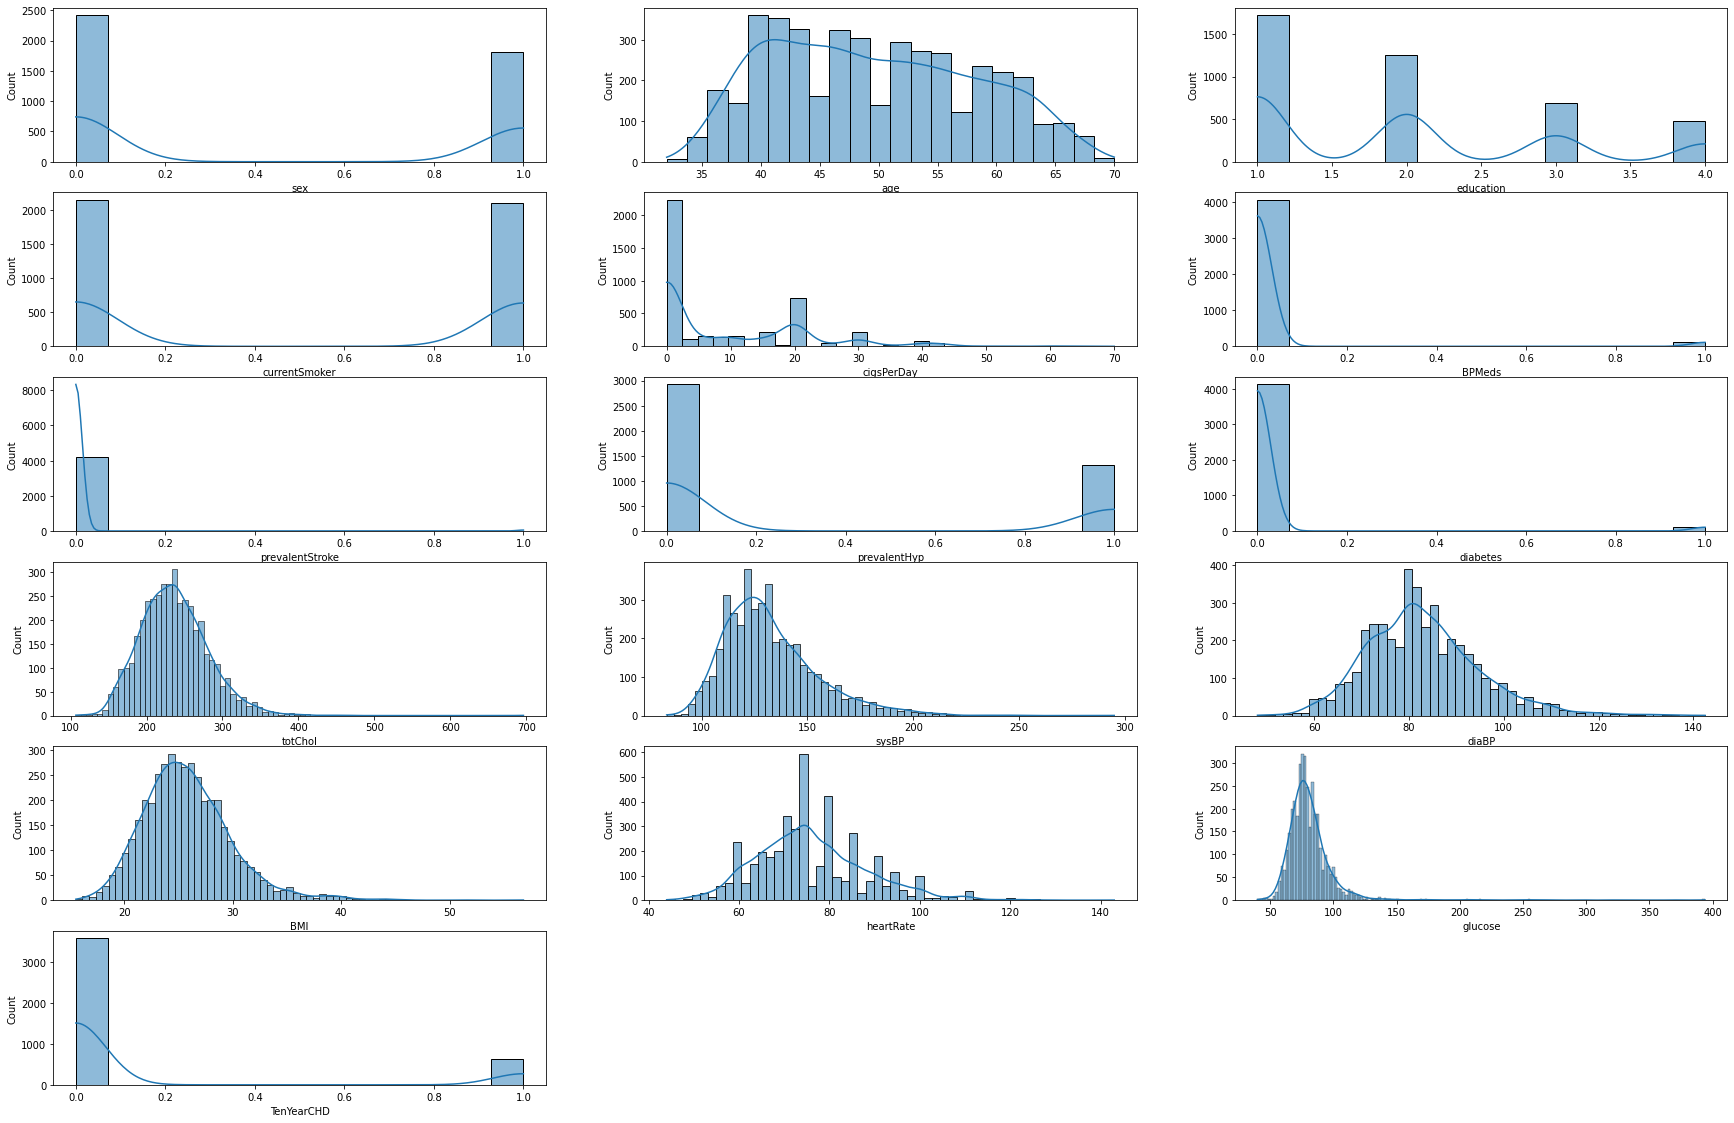

In [328]:
plt.figure(figsize=(30,30))

for i in range(len(clist)):
  plt.subplot(9,3,i+1)
  sns.histplot(data=heart_data[clist[i]],kde=True)

plotting the data points according to the dependent variable with respective to each independent variable

In [329]:
# plt.rcParams['figure.figsize'] = [9, 60]
# figure, axis = plt.subplots(nrows=15)

# for i in range(15):
#   axis[i].scatter(heart_data[clist[i]], heart_data['TenYearCHD'], c=heart_data["TenYearCHD"], label=heart_data["TenYearCHD"])
#   axis[i].set_xlabel(clist[i])
#   axis[i].set_ylabel("TenYearCHD")

plotting the data points according to each variable with respective to each variable

In [330]:
# plt.rcParams['figure.figsize'] = [200, 100]

# figure, axis = plt.subplots(nrows=16 , ncols=16)

# for i in range(len(clist)):
#   for j in range(len(clist)):
#     axis[i, j].scatter(heart_data[clist[i]], heart_data[clist[j]],c=heart_data["TenYearCHD"], label=heart_data["TenYearCHD"])
#     axis[i,j].set_xlabel(clist[i])
#     axis[i,j].set_ylabel(clist[j])

finding missing values

In [331]:
# are there any missing values present in the dataset 
missing=heart_data.isnull().sum()
mdict={}
for i in range(len(missing)):
  mdict[clist[i]]=missing[i]
mdf=pd.DataFrame(list(mdict.items()),columns=["feature",'number of missing values'])

In [332]:
# how many missing values are there and which features have missing values
mdf

,feature,number of missing values
0,sex,0
1,age,0
2,education,105
3,currentSmoker,0
4,cigsPerDay,29
5,BPMeds,53
6,prevalentStroke,0
7,prevalentHyp,0
8,diabetes,0
9,totChol,50


In [333]:
# separating the features which have missing values
m=[]
for i in mdict:
  mfeaturesvalues=[]
  if mdict[i]!=0:
    mfeaturesvalues.append(i)
    mfeaturesvalues.append(mdict[i])
    m.append(tuple(mfeaturesvalues))
mdf=pd.DataFrame(m,columns=["feature",'number of missing values'])

In [334]:
# features with missing values
print(m)
mdf

[('education', 105), ('cigsPerDay', 29), ('BPMeds', 53), ('totChol', 50), ('BMI', 19), ('heartRate', 1), ('glucose', 388)]


,feature,number of missing values
0,education,105
1,cigsPerDay,29
2,BPMeds,53
3,totChol,50
4,BMI,19
5,heartRate,1
6,glucose,388


**Total 7 Columns have missing values. **
1. education
2. cigsPerDay
3. BPMeds
4. totChol
5. BMI
6. heartRate
7. glucose

Methods to Handle Missing Values:
1. Imputation [This is a perfect method for handeling missing values. Because it tells us to fill the missing values with the reference of statistical values mean, median and mode or central tendencies. Also, we can use KNN imputation method for imputing missing values.] (Actually, Imputing the missing data)
2. Dropping [This method is not efficient. Because it tells us to delete all the rows with missing values.] (Actually, dropping the missing data)

So, here we use Imputation for missing values handling.

That's why we need to calculate some statistical values first.

Those are,

Central Tendencies:
1. Mean [Average value of all the values]
2. Median [For odd number of values : middle most value of all the values in an order (ascending/descending) | For even number of values : mean of two middle most value of all the values in an order (ascending/descending)]
3. Mode [The value which have most frequencies of all the values]

Here are some general rules to know when to use what:
1. Mean is the most frequently used measure of central tendency and generally considered the best measure of it. However, there are some situations where either median or mode are preferred.
2. Median is the preferred measure of central tendency when:


*   There are a few extreme scores in the distribution of the data. (NOTE: Remember that a single outlier can have a great effect on the mean).
*   There are some missing or undetermined values in your data.
*   There is an open ended distribution (For example, if you have a data field which measures number of children and your options are 
0
, 
1
, 
2
, 
3
, 
4
, 
5
 or “
6
 or more,” than the “
6
 or more field” is open ended and makes calculating the mean impossible, since we do not know exact values for this field).
*   You have data measured on an ordinal scale.
3. Mode is the preferred measure when data are measured in a nominal ( and even sometimes ordinal) scale.



the situation of the data before filling the missing values

In [335]:
for i in m:
  print(Counter(heart_data[i[0]]))

Counter({1.0: 1720, 2.0: 1253, 3.0: 687, 4.0: 473, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})
Counter({0.0: 2144, 20.0: 734, 30.0: 217, 15.0: 210, 10.0: 143, 9.0: 130, 5.0: 121, 3.0: 100, 40.0: 80, 1.0:

visually obsereve positions of the data

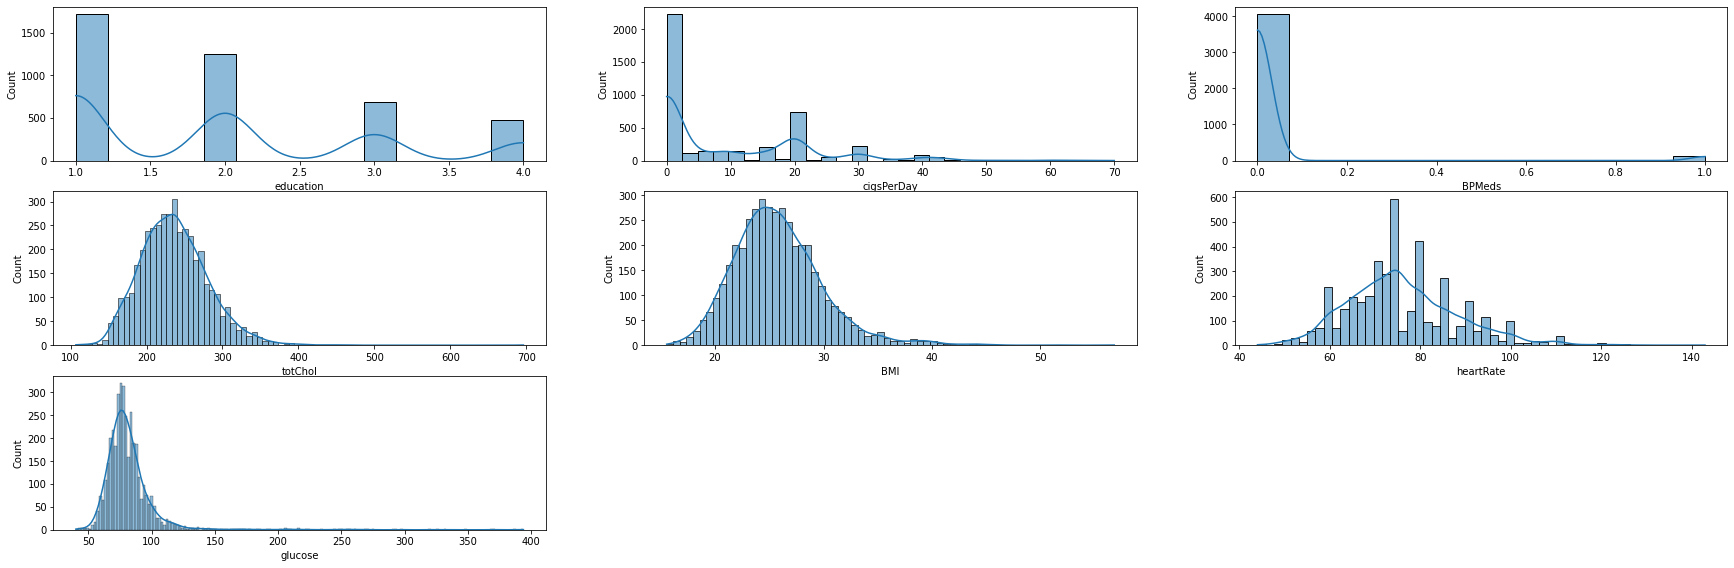

In [336]:
plt.figure(figsize=(30,30))

for i in range(len(m)):
  plt.subplot(9,3,i+1)
  sns.histplot(data=heart_data[m[i][0]],kde=True)

In [337]:
# fill all the missing values
for i in m:
  # check the variable discrete or continuous
  discrete_or_continuous=len(Counter(heart_data[i[0]].unique()))
  if discrete_or_continuous<=5:
    print("{} is discrete variable. \nso, fill this value with mode.".format(i[0]))
    heart_data[i[0]].fillna(heart_data[i[0]].mode()[0],inplace=True)
  else:
    print("{} is continuous variable. \nso, fill this value with mean.".format(i[0]))
    heart_data[i[0]].fillna(heart_data[i[0]].mean(),inplace=True)
  print("-----------------------------")

education is discrete variable. 
so, fill this value with mode.
-----------------------------
cigsPerDay is continuous variable. 
so, fill this value with mean.
-----------------------------
BPMeds is discrete variable. 
so, fill this value with mode.
-----------------------------
totChol is continuous variable. 
so, fill this value with mean.
-----------------------------
BMI is continuous variable. 
so, fill this value with mean.
-----------------------------
heartRate is continuous variable. 
so, fill this value with mean.
-----------------------------
glucose is continuous variable. 
so, fill this value with mean.
-----------------------------


the situation of the data after filling the missing values

In [338]:
for i in m:
  print(Counter(heart_data[i[0]]))

Counter({1.0: 1825, 2.0: 1253, 3.0: 687, 4.0: 473})
Counter({0.0: 2144, 20.0: 734, 30.0: 217, 15.0: 210, 10.0: 143, 9.0: 130, 5.0: 121, 3.0: 100, 40.0: 80, 1.0: 67, 43.0: 56, 25.0: 55, 9.003088619624615: 29, 35.0: 22, 2.0: 18, 6.0: 18, 7.0: 12, 60.0: 11, 8.0: 11, 4.0: 9, 18.0: 8, 17.0: 7, 23.0: 6, 50.0: 6, 11.0: 5, 12.0: 3, 45.0: 3, 13.0: 3, 16.0: 3, 14.0: 2, 19.0: 2, 38.0: 1, 29.0: 1, 70.0: 1})
Counter({0.0: 4114, 1.0: 124})
Counter({240.0: 85, 220.0: 70, 260.0: 62, 210.0: 61, 232.0: 59, 250.0: 57, 200.0: 56, 225.0: 54, 230.0: 54, 205.0: 53, 236.72158548233045: 50, 195.0: 48, 246.0: 48, 215.0: 47, 270.0: 47, 235.0: 47, 245.0: 45, 212.0: 44, 190.0: 43, 214.0: 43, 254.0: 42, 239.0: 42, 229.0: 42, 226.0: 40, 234.0: 40, 238.0: 39, 252.0: 38, 219.0: 38, 258.0: 37, 193.0: 36, 185.0: 35, 241.0: 35, 222.0: 35, 242.0: 35, 216.0: 34, 248.0: 34, 253.0: 34, 285.0: 33, 233.0: 33, 266.0: 33, 275.0: 33, 265.0: 33, 273.0: 33, 206.0: 33, 243.0: 32, 237.0: 32, 213.0: 32, 262.0: 32, 231.0: 32, 180.0: 31

In [339]:
# is there any missing values
missing=heart_data.isnull().sum()
mdict={}
for i in range(len(missing)):
  mdict[clist[i]]=missing[i]
mdf=pd.DataFrame(list(mdict.items()),columns=["feature",'number of missing values'])

In [340]:
# there is no more missing values
mdf

,feature,number of missing values
0,sex,0
1,age,0
2,education,0
3,currentSmoker,0
4,cigsPerDay,0
5,BPMeds,0
6,prevalentStroke,0
7,prevalentHyp,0
8,diabetes,0
9,totChol,0


In [341]:
# display the entire dataframe
display(heart_data)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


In [342]:
# copy the data
hd=heart_data.copy()
display(hd)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


In [343]:
hd.columns

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [344]:
Counter(hd)

Counter({'BMI': 1,
         'BPMeds': 1,
         'TenYearCHD': 1,
         'age': 1,
         'cigsPerDay': 1,
         'currentSmoker': 1,
         'diaBP': 1,
         'diabetes': 1,
         'education': 1,
         'glucose': 1,
         'heartRate': 1,
         'prevalentHyp': 1,
         'prevalentStroke': 1,
         'sex': 1,
         'sysBP': 1,
         'totChol': 1})

In [345]:
hd.shape

(4238, 16)

feature selection

seperate discrete variables and continuous variables

In [346]:
discretev=[]
continuousv=[]
for i in clist[0:15]:
  if len(Counter(heart_data[i]))<=4:
    discretev.append(i)
  else:
    continuousv.append(i)
print(discretev)
print(continuousv)

['sex', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


seperating the dataset with respect to the discrete variables and continuous variables

In [347]:
hd_with_discrete_features=hd.drop(continuousv,axis=1)
hd_with_continuous_features=hd.drop(discretev,axis=1)

In [348]:
hd_with_discrete_features

,sex,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,1,4.0,0,0.0,0,0,0,0
1,0,2.0,0,0.0,0,0,0,0
2,1,1.0,1,0.0,0,0,0,0
3,0,3.0,1,0.0,0,1,0,1
4,0,3.0,1,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...
4233,1,1.0,1,0.0,0,1,0,1
4234,1,3.0,1,0.0,0,0,0,0
4235,0,2.0,1,0.0,0,0,0,0
4236,0,1.0,1,0.0,0,0,0,0


In [349]:
hd_with_continuous_features

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...
4233,50,1.0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,51,43.0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,48,20.0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,44,15.0,210.0,126.5,87.0,19.16,86.0,81.966753,0


apply chi square on those features which have discrete/categorical values

In [350]:
from sklearn.feature_selection import chi2
f_scores,p_values=chi2(hd_with_discrete_features.drop("TenYearCHD",axis=1),hd_with_discrete_features["TenYearCHD"])

In [351]:
fScores=pd.Series(f_scores,index=discretev)

In [352]:
fScores

sex                18.915212
education           6.271609
currentSmoker       0.811603
BPMeds             30.723031
prevalentStroke    16.095638
prevalentHyp       92.167857
diabetes           39.103710
dtype: float64

In [353]:
fScores.sort_values(ascending=False)

prevalentHyp       92.167857
diabetes           39.103710
BPMeds             30.723031
sex                18.915212
prevalentStroke    16.095638
education           6.271609
currentSmoker       0.811603
dtype: float64

In [354]:
data=fScores.sort_values(ascending=False).items()
x, y = zip(*data)

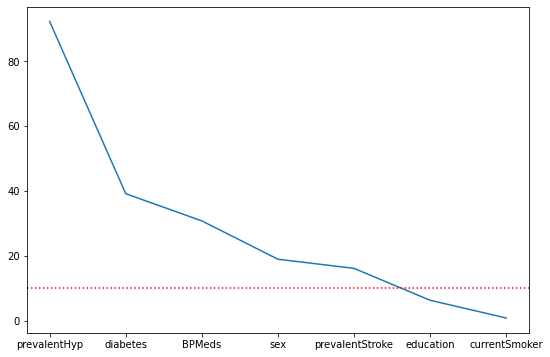

In [355]:
plt.figure(figsize=(9,6))

plt.plot(x,y)
plt.axhline(y=10,color="red",linestyle='dotted')

In [356]:
pValues=pd.Series(p_values,index=discretev)

In [357]:
pValues

sex                1.366586e-05
education          1.226877e-02
currentSmoker      3.676467e-01
BPMeds             2.976116e-08
prevalentStroke    6.022260e-05
prevalentHyp       7.962765e-22
diabetes           4.018796e-10
dtype: float64

In [358]:
pValues.sort_values(ascending=True)

prevalentHyp       7.962765e-22
diabetes           4.018796e-10
BPMeds             2.976116e-08
sex                1.366586e-05
prevalentStroke    6.022260e-05
education          1.226877e-02
currentSmoker      3.676467e-01
dtype: float64

In [359]:
data=pValues.sort_values(ascending=True).items()
x, y = zip(*data)

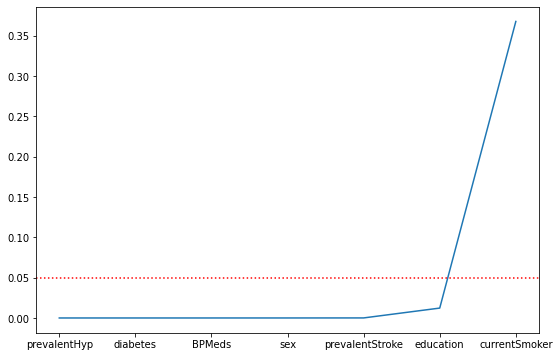

In [360]:
plt.figure(figsize=(9,6))

plt.plot(x,y)
plt.axhline(y=0.05,color="red",linestyle='dotted')

In [361]:
# find the features which have p values less that 0.05
eliminated=[]
for i,v in pValues.sort_values(ascending=True).items():
  if v > 0.05:
    eliminated.append(i)

In [362]:
# need to eleminate this features
print(eliminated)

['currentSmoker']


eliminate features

In [363]:
hdd=hd_with_discrete_features.drop(eliminated,axis=1)

In [364]:
hdd

,sex,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,1,4.0,0.0,0,0,0,0
1,0,2.0,0.0,0,0,0,0
2,1,1.0,0.0,0,0,0,0
3,0,3.0,0.0,0,1,0,1
4,0,3.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...
4233,1,1.0,0.0,0,1,0,1
4234,1,3.0,0.0,0,0,0,0
4235,0,2.0,0.0,0,0,0,0
4236,0,1.0,0.0,0,0,0,0


apply anova (analysis of varience) on those features which have continuous values

In [365]:
from sklearn.feature_selection import SelectKBest, f_classif
select = SelectKBest(f_classif, k=len(continuousv)).fit(hd_with_continuous_features.drop("TenYearCHD",axis=1),hd_with_continuous_features["TenYearCHD"])
names=select.get_feature_names_out()
f_scores=select.scores_
p_values=select.pvalues_

In [366]:
names

array(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose'], dtype=object)

In [367]:
f_scores

array([226.42482952,  14.18682464,  28.41161556, 208.17180252,
        91.35845441,  23.7570853 ,   2.22208427,  62.31568409])

In [368]:
fScores=pd.Series(f_scores,index=continuousv)

In [369]:
fScores

age           226.424830
cigsPerDay     14.186825
totChol        28.411616
sysBP         208.171803
diaBP          91.358454
BMI            23.757085
heartRate       2.222084
glucose        62.315684
dtype: float64

In [370]:
fScores.sort_values(ascending=False)

age           226.424830
sysBP         208.171803
diaBP          91.358454
glucose        62.315684
totChol        28.411616
BMI            23.757085
cigsPerDay     14.186825
heartRate       2.222084
dtype: float64

In [371]:
data=fScores.sort_values(ascending=False).items()
x, y = zip(*data)

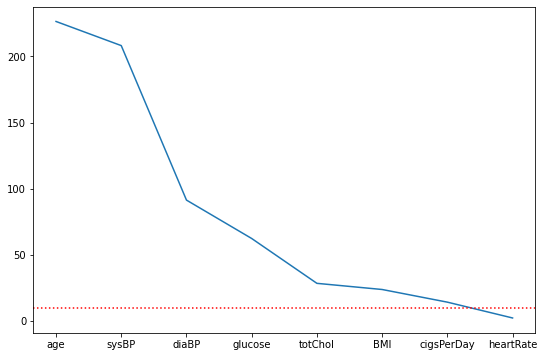

In [372]:
plt.figure(figsize=(9,6))

plt.plot(x,y)
plt.axhline(y=10,color="red",linestyle='dotted')

In [373]:
pValues=pd.Series(p_values,index=continuousv)

In [374]:
pValues

age           6.845009e-50
cigsPerDay    1.677730e-04
totChol       1.031783e-07
sysBP         4.195340e-46
diaBP         1.968835e-21
BMI           1.132915e-06
heartRate     1.361237e-01
glucose       3.698009e-15
dtype: float64

In [375]:
pValues.sort_values(ascending=True)

age           6.845009e-50
sysBP         4.195340e-46
diaBP         1.968835e-21
glucose       3.698009e-15
totChol       1.031783e-07
BMI           1.132915e-06
cigsPerDay    1.677730e-04
heartRate     1.361237e-01
dtype: float64

In [376]:
data=pValues.sort_values(ascending=True).items()
x, y = zip(*data)

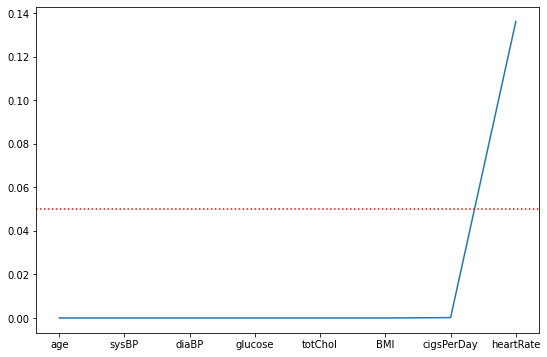

In [377]:
plt.figure(figsize=(9,6))

plt.plot(x,y)
plt.axhline(y=0.05,color="red",linestyle='dotted')

In [378]:
# find the features which have p values less that 0.05
eliminatec=[]
for i,v in pValues.sort_values(ascending=True).items():
  if v > 0.05:
    eliminatec.append(i)

In [379]:
# need to eleminate this features
print(eliminatec)

['heartRate']


eliminate features

In [380]:
hdc=hd_with_continuous_features.drop(eliminatec,axis=1)

In [381]:
hdc

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,39,0.0,195.0,106.0,70.0,26.97,77.000000,0
1,46,0.0,250.0,121.0,81.0,28.73,76.000000,0
2,48,20.0,245.0,127.5,80.0,25.34,70.000000,0
3,61,30.0,225.0,150.0,95.0,28.58,103.000000,1
4,46,23.0,285.0,130.0,84.0,23.10,85.000000,0
...,...,...,...,...,...,...,...,...
4233,50,1.0,313.0,179.0,92.0,25.97,86.000000,1
4234,51,43.0,207.0,126.5,80.0,19.71,68.000000,0
4235,48,20.0,248.0,131.0,72.0,22.00,86.000000,0
4236,44,15.0,210.0,126.5,87.0,19.16,81.966753,0


full outer join of two dataframes and create a new dataframe

In [382]:
new_hd=pd.concat([hdc.drop("TenYearCHD",axis=1) ,hdd], axis=1, ignore_index=False)

In [383]:
new_hd

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,sex,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,39,0.0,195.0,106.0,70.0,26.97,77.000000,1,4.0,0.0,0,0,0,0
1,46,0.0,250.0,121.0,81.0,28.73,76.000000,0,2.0,0.0,0,0,0,0
2,48,20.0,245.0,127.5,80.0,25.34,70.000000,1,1.0,0.0,0,0,0,0
3,61,30.0,225.0,150.0,95.0,28.58,103.000000,0,3.0,0.0,0,1,0,1
4,46,23.0,285.0,130.0,84.0,23.10,85.000000,0,3.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,50,1.0,313.0,179.0,92.0,25.97,86.000000,1,1.0,0.0,0,1,0,1
4234,51,43.0,207.0,126.5,80.0,19.71,68.000000,1,3.0,0.0,0,0,0,0
4235,48,20.0,248.0,131.0,72.0,22.00,86.000000,0,2.0,0.0,0,0,0,0
4236,44,15.0,210.0,126.5,87.0,19.16,81.966753,0,1.0,0.0,0,0,0,0


details about the preprocessed dataset after missing value filling and feature selection

In [384]:
r, c=new_hd.shape

In [385]:
r

4238

In [386]:
c

14

In [387]:
newclist=new_hd.columns

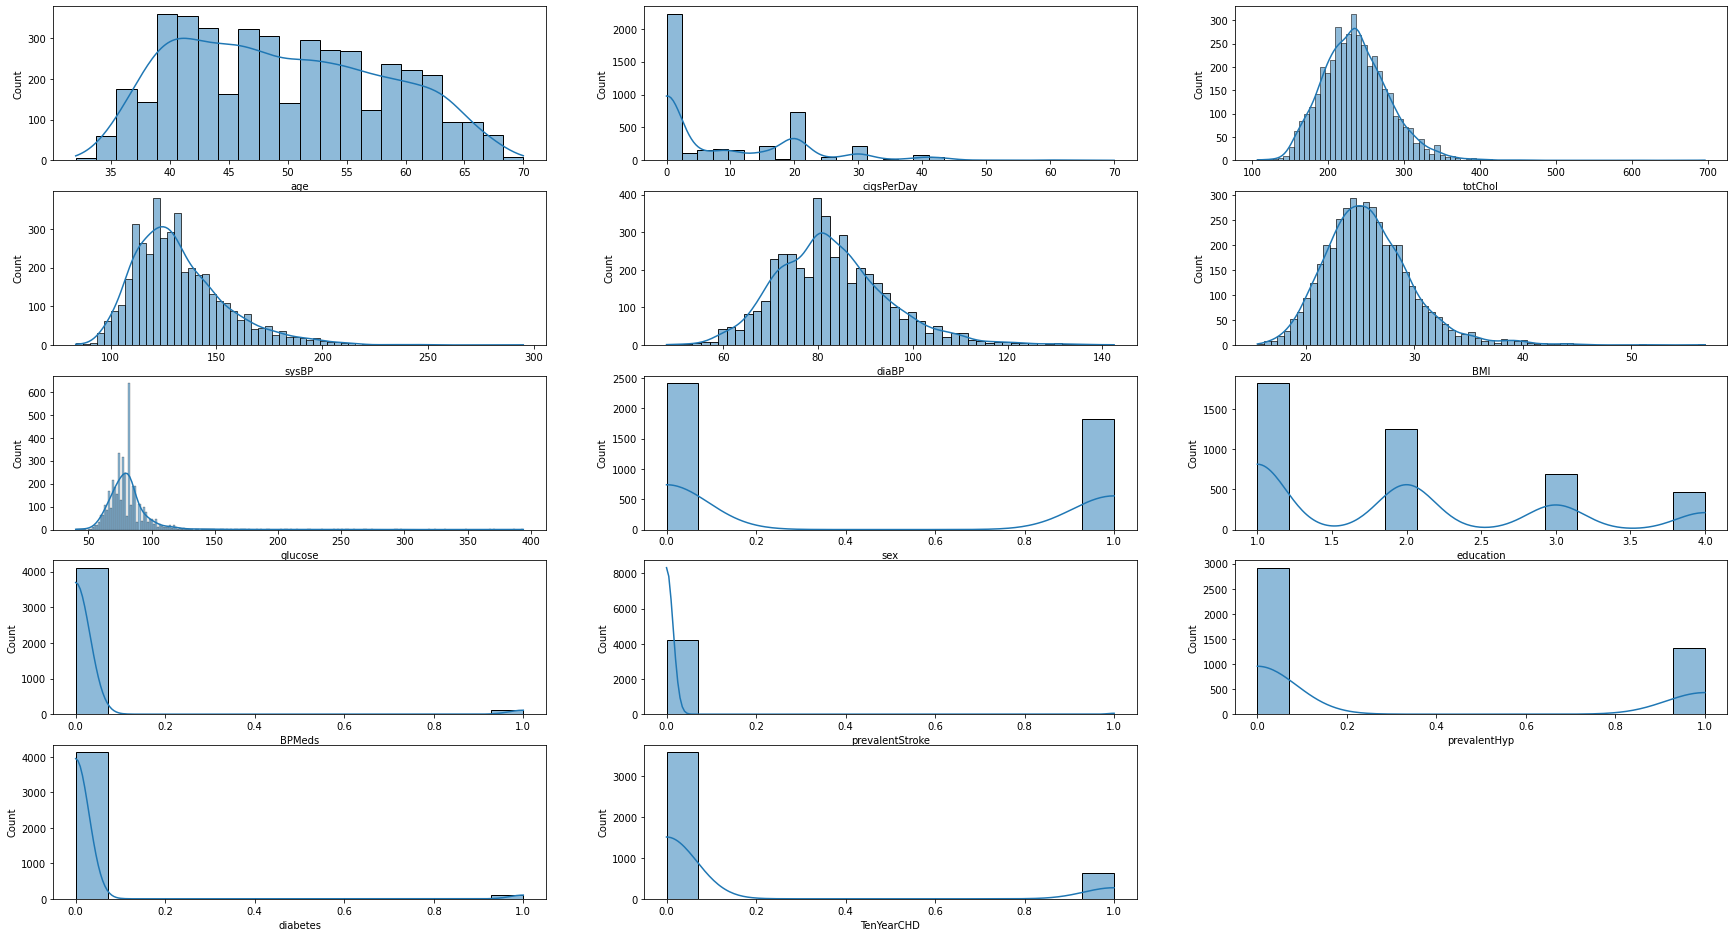

In [388]:
plt.figure(figsize=(30,30))

for i in range(len(newclist)):
  plt.subplot(9,3,i+1)
  sns.histplot(data=new_hd[newclist[i]],kde=True)

In [389]:
for i in dict(Counter(new_hd)):
  print(i)
  print(Counter(new_hd[i]))
  print("------------")

age
Counter({40: 191, 46: 182, 42: 180, 41: 174, 48: 173, 39: 169, 44: 166, 45: 162, 43: 159, 52: 149, 51: 146, 55: 145, 38: 144, 47: 141, 50: 140, 53: 139, 54: 132, 49: 132, 56: 123, 57: 123, 59: 119, 58: 117, 60: 111, 61: 110, 63: 110, 62: 99, 64: 93, 37: 92, 36: 84, 65: 57, 67: 45, 35: 42, 66: 38, 34: 18, 68: 18, 69: 7, 33: 5, 70: 2, 32: 1})
------------
cigsPerDay
Counter({0.0: 2144, 20.0: 734, 30.0: 217, 15.0: 210, 10.0: 143, 9.0: 130, 5.0: 121, 3.0: 100, 40.0: 80, 1.0: 67, 43.0: 56, 25.0: 55, 9.003088619624615: 29, 35.0: 22, 2.0: 18, 6.0: 18, 7.0: 12, 60.0: 11, 8.0: 11, 4.0: 9, 18.0: 8, 17.0: 7, 23.0: 6, 50.0: 6, 11.0: 5, 12.0: 3, 45.0: 3, 13.0: 3, 16.0: 3, 14.0: 2, 19.0: 2, 38.0: 1, 29.0: 1, 70.0: 1})
------------
totChol
Counter({240.0: 85, 220.0: 70, 260.0: 62, 210.0: 61, 232.0: 59, 250.0: 57, 200.0: 56, 225.0: 54, 230.0: 54, 205.0: 53, 236.72158548233045: 50, 195.0: 48, 246.0: 48, 215.0: 47, 270.0: 47, 235.0: 47, 245.0: 45, 212.0: 44, 190.0: 43, 214.0: 43, 254.0: 42, 239.0: 4

copy the preprocessed dataframe

In [390]:
heart=new_hd.copy()

In [391]:
heart

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,sex,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,39,0.0,195.0,106.0,70.0,26.97,77.000000,1,4.0,0.0,0,0,0,0
1,46,0.0,250.0,121.0,81.0,28.73,76.000000,0,2.0,0.0,0,0,0,0
2,48,20.0,245.0,127.5,80.0,25.34,70.000000,1,1.0,0.0,0,0,0,0
3,61,30.0,225.0,150.0,95.0,28.58,103.000000,0,3.0,0.0,0,1,0,1
4,46,23.0,285.0,130.0,84.0,23.10,85.000000,0,3.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,50,1.0,313.0,179.0,92.0,25.97,86.000000,1,1.0,0.0,0,1,0,1
4234,51,43.0,207.0,126.5,80.0,19.71,68.000000,1,3.0,0.0,0,0,0,0
4235,48,20.0,248.0,131.0,72.0,22.00,86.000000,0,2.0,0.0,0,0,0,0
4236,44,15.0,210.0,126.5,87.0,19.16,81.966753,0,1.0,0.0,0,0,0,0


In [392]:
heart["BPMeds"]=heart.BPMeds.astype("int64")
heart["education"]=heart.education.astype("int64")

In [393]:
heart

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,sex,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,39,0.0,195.0,106.0,70.0,26.97,77.000000,1,4,0,0,0,0,0
1,46,0.0,250.0,121.0,81.0,28.73,76.000000,0,2,0,0,0,0,0
2,48,20.0,245.0,127.5,80.0,25.34,70.000000,1,1,0,0,0,0,0
3,61,30.0,225.0,150.0,95.0,28.58,103.000000,0,3,0,0,1,0,1
4,46,23.0,285.0,130.0,84.0,23.10,85.000000,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,50,1.0,313.0,179.0,92.0,25.97,86.000000,1,1,0,0,1,0,1
4234,51,43.0,207.0,126.5,80.0,19.71,68.000000,1,3,0,0,0,0,0
4235,48,20.0,248.0,131.0,72.0,22.00,86.000000,0,2,0,0,0,0,0
4236,44,15.0,210.0,126.5,87.0,19.16,81.966753,0,1,0,0,0,0,0


splitting the dataset into train dataset and test dataset

In [394]:
train_o,test=train_test_split(heart,test_size=0.2,random_state=100)

In [395]:
t=train_o.reset_index(drop=True)

In [396]:
t.head(10)

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,sex,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,51,15.0,220.0,125.0,82.0,24.10,73.0,1,1,0,0,0,0,1
1,48,0.0,274.0,110.0,84.0,22.51,78.0,0,1,0,0,0,0,0
2,38,20.0,195.0,116.0,72.0,24.45,90.0,0,2,0,0,0,0,0
3,65,0.0,344.0,120.0,75.0,25.41,98.0,0,3,0,0,0,0,0
4,51,20.0,256.0,130.0,75.0,28.76,83.0,1,1,0,0,0,0,0
5,47,0.0,220.0,124.0,75.5,24.71,68.0,0,1,0,1,0,0,0
6,39,0.0,197.0,134.0,78.0,30.36,83.0,0,2,0,0,0,0,0
7,39,0.0,190.0,120.0,80.0,27.16,85.0,0,2,0,0,0,0,0
8,64,0.0,210.0,120.0,68.0,24.77,77.0,1,2,0,0,0,0,1
9,49,2.0,255.0,143.5,81.0,25.65,80.0,1,1,0,0,1,0,0


In [397]:
test

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,sex,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
3207,52,20.0,205.0,136.5,92.5,31.05,81.966753,1,3,0,0,0,0,1
263,64,0.0,217.0,147.0,87.0,29.73,81.966753,1,1,0,0,1,0,0
3200,45,20.0,297.0,142.0,91.0,35.02,86.000000,0,2,0,0,1,0,0
1295,45,15.0,222.0,95.0,58.0,21.68,77.000000,0,2,0,0,0,0,0
3829,55,0.0,232.0,132.5,87.0,20.72,71.000000,1,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,40,20.0,220.0,120.0,75.0,19.32,81.966753,0,1,0,0,0,0,0
2506,57,0.0,199.0,117.0,83.0,24.76,82.000000,0,2,0,0,0,0,0
1656,40,5.0,174.0,130.0,86.0,25.05,83.000000,0,2,0,0,0,0,0
3517,62,0.0,186.0,176.5,92.0,22.53,60.000000,0,1,1,0,1,0,1


In [398]:
train_o.shape

(3390, 14)

In [399]:
test.shape

(848, 14)

In [400]:
Counter(train_o["TenYearCHD"])

Counter({0: 2882, 1: 508})

In [401]:
Counter(test["TenYearCHD"])

Counter({0: 712, 1: 136})

normalize the train dataset

In [402]:
from sklearn import preprocessing
d = preprocessing.normalize(t.drop("TenYearCHD",axis=1))
n_train = pd.DataFrame(d, columns=list(t.columns)[0:13])
n_train["TenYearCHD"]=t["TenYearCHD"]
n_train.head(10)

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,sex,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,0.180893,0.053204,0.780324,0.443366,0.290848,0.085481,0.258926,0.003547,0.003547,0.0,0.000000,0.000000,0.0,1
1,0.149470,0.000000,0.853224,0.342535,0.261572,0.070095,0.242888,0.000000,0.003114,0.0,0.000000,0.000000,0.0,0
2,0.146576,0.077145,0.752168,0.447444,0.277724,0.094310,0.347155,0.000000,0.007715,0.0,0.000000,0.000000,0.0,0
3,0.166260,0.000000,0.879900,0.306942,0.191839,0.064995,0.250669,0.000000,0.007674,0.0,0.000000,0.000000,0.0,0
4,0.162269,0.063635,0.814526,0.413627,0.238631,0.091507,0.264085,0.003182,0.003182,0.0,0.000000,0.000000,0.0,0
5,0.169462,0.000000,0.793228,0.447092,0.272221,0.089094,0.245179,0.000000,0.003606,0.0,0.003606,0.000000,0.0,0
6,0.145158,0.000000,0.733236,0.498749,0.290317,0.113000,0.308927,0.000000,0.007444,0.0,0.000000,0.000000,0.0,0
7,0.151363,0.000000,0.737411,0.465734,0.310489,0.105411,0.329895,0.000000,0.007762,0.0,0.000000,0.000000,0.0,0
8,0.235639,0.000000,0.773191,0.441823,0.250367,0.091200,0.283503,0.003682,0.007364,0.0,0.000000,0.000000,0.0,1
9,0.153693,0.006273,0.799832,0.450102,0.254064,0.080454,0.250928,0.003137,0.003137,0.0,0.000000,0.003137,0.0,0


balance dataset

In [403]:
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE

oversampling

In [404]:
# sm=SMOTE(sampling_strategy=1,random_state=100)
# train_n, y_train = sm.fit_resample(n_train.drop("TenYearCHD",axis=1),n_train["TenYearCHD"])
# train_n["TenYearCHD"]=y_train

undersampling

In [405]:
# cc = ClusterCentroids(random_state=100)
# train_n, y_train = cc.fit_resample(n_train.drop("TenYearCHD",axis=1),n_train["TenYearCHD"])
# train_n["TenYearCHD"]=y_train

as it is

In [406]:
train_n=n_train

In [407]:
train_n.shape

(3390, 14)

In [408]:
test.shape

(848, 14)

In [409]:
Counter(train_n["TenYearCHD"])

Counter({0: 2882, 1: 508})

In [410]:
Counter(test["TenYearCHD"])

Counter({0: 712, 1: 136})

In [411]:
train=train_n

In [412]:
train

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,sex,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,0.180893,0.053204,0.780324,0.443366,0.290848,0.085481,0.258926,0.003547,0.003547,0.000000,0.000000,0.000000,0.0,1
1,0.149470,0.000000,0.853224,0.342535,0.261572,0.070095,0.242888,0.000000,0.003114,0.000000,0.000000,0.000000,0.0,0
2,0.146576,0.077145,0.752168,0.447444,0.277724,0.094310,0.347155,0.000000,0.007715,0.000000,0.000000,0.000000,0.0,0
3,0.166260,0.000000,0.879900,0.306942,0.191839,0.064995,0.250669,0.000000,0.007674,0.000000,0.000000,0.000000,0.0,0
4,0.162269,0.063635,0.814526,0.413627,0.238631,0.091507,0.264085,0.003182,0.003182,0.000000,0.000000,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,0.198495,0.000000,0.714582,0.490824,0.335637,0.081347,0.299547,0.000000,0.007218,0.000000,0.000000,0.003609,0.0,0
3386,0.168282,0.000000,0.757267,0.444263,0.272616,0.079496,0.346660,0.000000,0.006731,0.000000,0.000000,0.000000,0.0,0
3387,0.142225,0.000000,0.730088,0.497787,0.330278,0.072250,0.290771,0.000000,0.009482,0.000000,0.000000,0.003161,0.0,0
3388,0.120915,0.126813,0.808066,0.448270,0.265423,0.090185,0.191694,0.002949,0.005898,0.000000,0.000000,0.002949,0.0,0


**model**

In [413]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

**clustering**

**create a function for finding best k for kmeans**

In [414]:
iterations=20

In [415]:
def findBestKForKMeans(dataset,iterations):
  distortions = {}
  inertias = {}
  K = range(1, iterations+1)

  for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(dataset)
    kmeanModel.fit(dataset)
  
    distortions[k] = sum(np.min(cdist(dataset, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / dataset.shape[0]
    inertias[k] = kmeanModel.inertia_
 
  return distortions,inertias

**find the best k value for train dataset**

In [416]:
d,i=findBestKForKMeans(train,iterations)

In [417]:
for key, val in d.items():
    print(f'{key} : {round(val,4)}')

1 : 0.2901
2 : 0.1114
3 : 0.0938
4 : 0.0875
5 : 0.0839
6 : 0.0819
7 : 0.0782
8 : 0.075
9 : 0.0737
10 : 0.0705
11 : 0.0689
12 : 0.067
13 : 0.0658
14 : 0.0644
15 : 0.0636
16 : 0.0629
17 : 0.0619
18 : 0.0606
19 : 0.06
20 : 0.0591


In [418]:
data=d.items()
x, y = zip(*data)

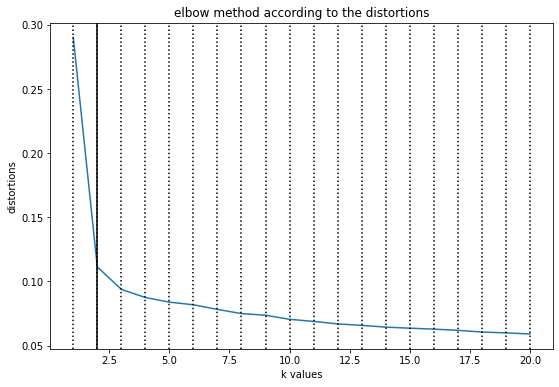

In [419]:
plt.figure(figsize=(9,6))

plt.plot(x,y)
plt.ylabel("distortions")
plt.xlabel("k values")
plt.title("elbow method according to the distortions")

for count in range(1,iterations+1):
  plt.axvline(x=count,color="black",linestyle='dotted')
plt.axvline(x=2,color="black",linestyle='solid')

plt.show()

In [420]:
for key, val in i.items():
    print(f'{key} : {round(val,6)}')

1 : 486.653383
2 : 54.531113
3 : 39.325406
4 : 34.99049
5 : 31.186788
6 : 28.025292
7 : 25.288062
8 : 23.28854
9 : 21.667391
10 : 20.106116
11 : 19.138709
12 : 18.208812
13 : 17.378067
14 : 16.717314
15 : 16.194036
16 : 15.809408
17 : 15.303588
18 : 14.802779
19 : 14.518512
20 : 14.043214


In [421]:
data=i.items()
x, y = zip(*data)

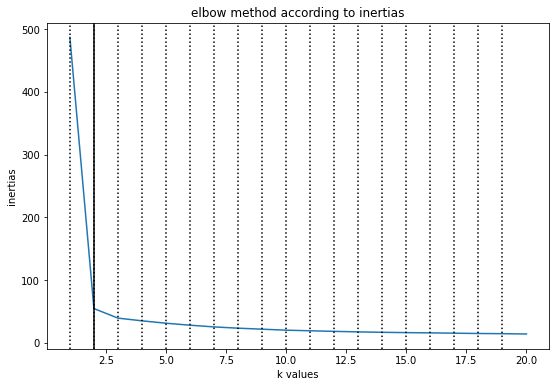

In [422]:
plt.figure(figsize=(9,6))

plt.plot(x,y)
plt.ylabel("inertias")
plt.xlabel("k values")
plt.title("elbow method according to inertias")

for i in range(1,iterations):
  plt.axvline(x=i,color="black",linestyle='dotted')
plt.axvline(x=2,color="black",linestyle='solid')

plt.show()

In [423]:
clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, random_state=100)
k_means.fit(train)
labels = k_means.labels_
print(labels)
# initialize the cluster number for further use
start=clusterNum

[1 0 0 ... 0 0 0]


In [424]:
Counter(labels)

Counter({0: 2882, 1: 508})

In [425]:
k_means_cluster_centers = k_means.cluster_centers_
centroids=pd.DataFrame(k_means_cluster_centers,columns=newclist)

In [426]:
centroids

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,sex,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,0.163966,0.030151,0.779870,0.436962,0.276290,0.086760,0.272889,0.001407,0.006676,0.000072,0.000014,0.000847,0.000058,4.968248e-15
1,0.172485,0.031988,0.763622,0.451737,0.274814,0.083999,0.274671,0.001639,0.005702,0.000199,0.000056,0.001533,0.000172,1.000000e+00


In [427]:
centroids["CLUSTER"]=[i+1 for i in range(len(centroids))]
centroids.set_index("CLUSTER", inplace=True)
centroids

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,sex,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
CLUSTER,,,,,,,,,,,,,,
1,0.163966,0.030151,0.779870,0.436962,0.276290,0.086760,0.272889,0.001407,0.006676,0.000072,0.000014,0.000847,0.000058,4.968248e-15
2,0.172485,0.031988,0.763622,0.451737,0.274814,0.083999,0.274671,0.001639,0.005702,0.000199,0.000056,0.001533,0.000172,1.000000e+00


In [428]:
Counter(labels+1)

Counter({1: 2882, 2: 508})

In [429]:
train["CLUSTER"] = labels+1

In [430]:
train.head(50)

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,sex,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,CLUSTER
0,0.180893,0.053204,0.780324,0.443366,0.290848,0.085481,0.258926,0.003547,0.003547,0.000000,0.000000,0.000000,0.0,1,2
1,0.149470,0.000000,0.853224,0.342535,0.261572,0.070095,0.242888,0.000000,0.003114,0.000000,0.000000,0.000000,0.0,0,1
2,0.146576,0.077145,0.752168,0.447444,0.277724,0.094310,0.347155,0.000000,0.007715,0.000000,0.000000,0.000000,0.0,0,1
3,0.166260,0.000000,0.879900,0.306942,0.191839,0.064995,0.250669,0.000000,0.007674,0.000000,0.000000,0.000000,0.0,0,1
4,0.162269,0.063635,0.814526,0.413627,0.238631,0.091507,0.264085,0.003182,0.003182,0.000000,0.000000,0.000000,0.0,0,1
5,0.169462,0.000000,0.793228,0.447092,0.272221,0.089094,0.245179,0.000000,0.003606,0.000000,0.003606,0.000000,0.0,0,1
6,0.145158,0.000000,0.733236,0.498749,0.290317,0.113000,0.308927,0.000000,0.007444,0.000000,0.000000,0.000000,0.0,0,1
7,0.151363,0.000000,0.737411,0.465734,0.310489,0.105411,0.329895,0.000000,0.007762,0.000000,0.000000,0.000000,0.0,0,1
8,0.235639,0.000000,0.773191,0.441823,0.250367,0.091200,0.283503,0.003682,0.007364,0.000000,0.000000,0.000000,0.0,1,2
9,0.153693,0.006273,0.799832,0.450102,0.254064,0.080454,0.250928,0.003137,0.003137,0.000000,0.000000,0.003137,0.0,0,1


In [431]:
Counter(train["CLUSTER"])

Counter({1: 2882, 2: 508})

**separate the clusters and specify it is either diseased cluster or non-diseased cluster**

In [432]:
for i in range(clusterNum):
  print("CLUSTER ",i+1," : ",Counter(train[train["CLUSTER"]==i+1]["TenYearCHD"]))
  print("---------------------")

CLUSTER  1  :  Counter({0: 2882})
---------------------
CLUSTER  2  :  Counter({1: 508})
---------------------


In [433]:
# set a counter for number of clusters
counting=clusterNum

In [434]:
diseasedClusters=[]
nonDiseasedClusters=[]
for i in range(clusterNum):
  counterd=dict(Counter(train[train["CLUSTER"]==i+1]["TenYearCHD"]))

  f=-1
  if 0 not in counterd:
    f=0
  elif 1 not in counterd:
    f=1
  else:
    f=-1

  if (f==-1 and counterd[0]<counterd[1]) or (f==0):
    diseasedClusters.append(i+1)
  elif (f==-1 and counterd[0]>=counterd[1]) or (f==1):
    nonDiseasedClusters.append(i+1)

In [435]:
diseasedClusters

[2]

In [436]:
nonDiseasedClusters

[1]

**devide the each diseased clusters into more clusters**

In [437]:
# create new dataframe for each clusters
dd=[]
ii=[]
nameds=[]
for i in diseasedClusters:
  named="cluster_"+str(i)
  
  vars()[named]=None

  vars()[named]=train[train["CLUSTER"]==i].drop("CLUSTER",axis=1)
  nameds.append(vars()[named])


  d,i=findBestKForKMeans(vars()[named],iterations=10)
  dd.append(d)
  ii.append(i)

In [438]:
print(len(nameds))

1


In [439]:
for i in nameds:
  print(i.shape)

(508, 14)


create a function to plot the K values

In [440]:
def plotK(item,n="cluster name",iterations=10):
  data=item.items()
  x, y = zip(*data)

  plt.figure(figsize=(9,6))

  plt.plot(x,y)
  plt.ylabel("SSE")
  plt.xlabel("k values")
  plt.title("elbow method for "+n)

  for i in range(1,iterations):
    plt.axvline(x=i,color="black",linestyle='dotted')
  
  plt.show()

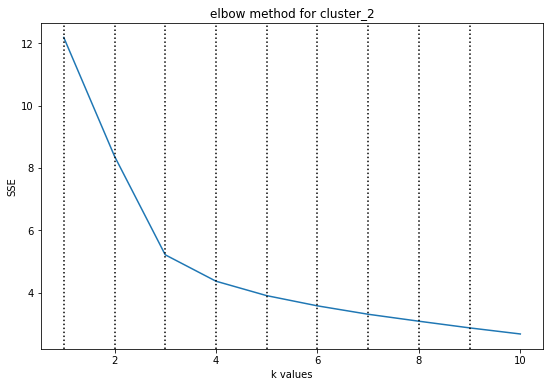

In [441]:
for i in range(len(nameds)):
  plotK(ii[i],n="cluster_"+str(diseasedClusters[i]))

In [442]:
for i in range(len(nameds)):
  clusterNum=3

  k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, random_state=100)
  k_means.fit(nameds[i])
  labels = k_means.labels_
  
  nameds[i]["CLUSTER"] = labels+counting+1
  
  k_means_cluster_centers = k_means.cluster_centers_
  centroid_name="centroid_"+str(diseasedClusters[i])
  
  vars()[centroid_name]=None
  vars()[centroid_name]=pd.DataFrame(k_means_cluster_centers,columns=newclist)

  vars()[centroid_name]["CLUSTER"]=[i+counting+1 for i in range(len(vars()[centroid_name]))]
  vars()[centroid_name].set_index("CLUSTER", inplace=True)
  
  counting+=clusterNum

**devide the each non diseased clusters into more clusters**

In [443]:
# create new dataframe for each clusters
dd=[]
ii=[]
namens=[]
for i in nonDiseasedClusters:
  namen="cluster_"+str(i)
  
  vars()[namen]=None

  vars()[namen]=train[train["CLUSTER"]==i].drop("CLUSTER",axis=1)
  namens.append(vars()[namen])


  d,i=findBestKForKMeans(vars()[namen],iterations=10)
  dd.append(d)
  ii.append(i)

In [444]:
print(len(namens))

1


In [445]:
for i in namens:
  print(i.shape)

(2882, 14)


create a function to plot the K values

In [446]:
def plotK(item,n="cluster name",iterations=10):
  data=item.items()
  x, y = zip(*data)

  plt.figure(figsize=(9,6))

  plt.plot(x,y)
  plt.ylabel("SSE")
  plt.xlabel("k values")
  plt.title("elbow method for "+n)

  for i in range(1,iterations):
    plt.axvline(x=i,color="black",linestyle='dotted')
  
  plt.show()

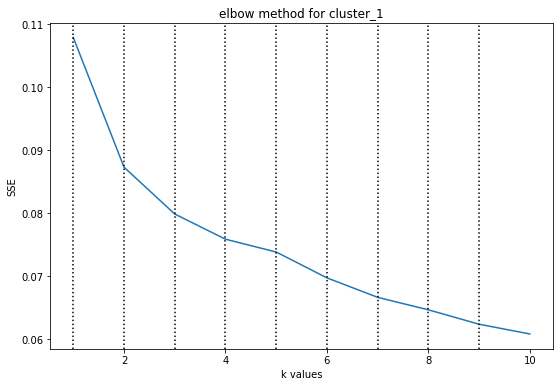

In [447]:
for i in range(len(namens)):
  plotK(dd[i],n="cluster_"+str(nonDiseasedClusters[i]))

In [448]:
for i in range(len(namens)):
  clusterNum=2

  k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, random_state=100)
  k_means.fit(namens[i])
  labels = k_means.labels_
  
  namens[i]["CLUSTER"] = labels+counting+1
  
  k_means_cluster_centers = k_means.cluster_centers_
  centroid_name="centroid_"+str(nonDiseasedClusters[i])
  
  vars()[centroid_name]=None
  vars()[centroid_name]=pd.DataFrame(k_means_cluster_centers,columns=newclist)

  vars()[centroid_name]["CLUSTER"]=[i+counting+1 for i in range(len(vars()[centroid_name]))]
  vars()[centroid_name].set_index("CLUSTER", inplace=True)
  
  counting+=clusterNum

**analyzing the sub clusters and their centroids**

In [449]:
clusters_list=[]
centroids_list=[]
for i in range(1,start+1):
  if i in diseasedClusters:
    print("we are on cluster "+n+", which is a diseased cluster")
  else:
    print("we are on cluster "+n+", which is a non-diseased cluster")
  n_n="cluster_"+str(i)
  c_c=vars()[n_n]
  print(Counter(c_c.CLUSTER))
  n__n="centroid_"+str(i)
  c__c=vars()[n__n]
  display(c__c)
  print("-------------------------")
  clusters_list.append(c_c)
  centroids_list.append(c__c)

we are on cluster cluster_2, which is a non-diseased cluster
Counter({6: 1646, 7: 1236})


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,sex,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
CLUSTER,,,,,,,,,,,,,,
6,0.157816,0.029675,0.819832,0.399420,0.254822,0.081997,0.251929,0.001287,0.006351,0.000048,0.000011,0.000547,0.000035,0.0
7,0.172144,0.030784,0.726727,0.486886,0.304839,0.093093,0.300762,0.001566,0.007109,0.000103,0.000017,0.001244,0.000088,0.0


-------------------------
we are on cluster cluster_2, which is a diseased cluster
Counter({5: 257, 4: 228, 3: 23})


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,sex,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
CLUSTER,,,,,,,,,,,,,,
3,0.140865,0.015341,0.612933,0.382619,0.225078,0.073942,0.614574,0.001374,0.003994,0.000253,0.000112,0.001448,0.002410,1.0
4,0.185761,0.032978,0.714769,0.514409,0.307360,0.089555,0.273798,0.001848,0.005797,0.000298,0.000076,0.002195,0.000120,1.0
5,0.163536,0.032600,0.820449,0.402323,0.250391,0.079971,0.245026,0.001477,0.005771,0.000107,0.000034,0.000953,0.000017,1.0


-------------------------


**create two important dataframes for further uses**

In [450]:
final_centroids=pd.concat(centroids_list)

In [451]:
final_train=pd.concat(clusters_list)

**separate the clusters and specify it is either diseased cluster or non-diseased cluster**

In [452]:
Counter(final_train.CLUSTER)

Counter({3: 23, 4: 228, 5: 257, 6: 1646, 7: 1236})

In [453]:
final_clusters=[]
for i in range(counting):
  if len(Counter(final_train[final_train["CLUSTER"]==i+1]["TenYearCHD"]))==0:
    continue
  print("CLUSTER ",i+1," : ",Counter(final_train[final_train["CLUSTER"]==i+1]["TenYearCHD"]))
  final_clusters.append(i)
  print("---------------------")

CLUSTER  3  :  Counter({1: 23})
---------------------
CLUSTER  4  :  Counter({1: 228})
---------------------
CLUSTER  5  :  Counter({1: 257})
---------------------
CLUSTER  6  :  Counter({0: 1646})
---------------------
CLUSTER  7  :  Counter({0: 1236})
---------------------


In [454]:
diseasedClusters=[]
nonDiseasedClusters=[]
for i in final_clusters:
  counterd=dict(Counter(final_train[final_train["CLUSTER"]==i+1]["TenYearCHD"]))

  f=-1
  if 0 not in counterd:
    f=0
  elif 1 not in counterd:
    f=1
  else:
    f=-1

  if (f==-1 and counterd[0]<counterd[1]) or (f==0):
    diseasedClusters.append(i+1)
  elif (f==-1 and counterd[0]>=counterd[1]) or (f==1):
    nonDiseasedClusters.append(i+1)

In [455]:
diseasedClusters

[3, 4, 5]

In [456]:
nonDiseasedClusters

[6, 7]

**classification**

**find the centroids of all the clusters**

---



In [457]:
train_ct=final_centroids
train_ct

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,sex,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
CLUSTER,,,,,,,,,,,,,,
6,0.157816,0.029675,0.819832,0.399420,0.254822,0.081997,0.251929,0.001287,0.006351,0.000048,0.000011,0.000547,0.000035,0.0
7,0.172144,0.030784,0.726727,0.486886,0.304839,0.093093,0.300762,0.001566,0.007109,0.000103,0.000017,0.001244,0.000088,0.0
3,0.140865,0.015341,0.612933,0.382619,0.225078,0.073942,0.614574,0.001374,0.003994,0.000253,0.000112,0.001448,0.002410,1.0
4,0.185761,0.032978,0.714769,0.514409,0.307360,0.089555,0.273798,0.001848,0.005797,0.000298,0.000076,0.002195,0.000120,1.0
5,0.163536,0.032600,0.820449,0.402323,0.250391,0.079971,0.245026,0.001477,0.005771,0.000107,0.000034,0.000953,0.000017,1.0


In [458]:
test

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,sex,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
3207,52,20.0,205.0,136.5,92.5,31.05,81.966753,1,3,0,0,0,0,1
263,64,0.0,217.0,147.0,87.0,29.73,81.966753,1,1,0,0,1,0,0
3200,45,20.0,297.0,142.0,91.0,35.02,86.000000,0,2,0,0,1,0,0
1295,45,15.0,222.0,95.0,58.0,21.68,77.000000,0,2,0,0,0,0,0
3829,55,0.0,232.0,132.5,87.0,20.72,71.000000,1,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,40,20.0,220.0,120.0,75.0,19.32,81.966753,0,1,0,0,0,0,0
2506,57,0.0,199.0,117.0,83.0,24.76,82.000000,0,2,0,0,0,0,0
1656,40,5.0,174.0,130.0,86.0,25.05,83.000000,0,2,0,0,0,0,0
3517,62,0.0,186.0,176.5,92.0,22.53,60.000000,0,1,1,0,1,0,1


**create a function to find the distances from each data points to nearest cluster centroid and find the nearest cluster**

In [459]:
number_of_columns=c

In [460]:
def closest_distances_and_closest_clusters(centroids, dataset, number_of_columns):
  """centroids and dataset must be in the form of pandas dataframe"""
  distances=[]
  clusters=[]
  for row1 in dataset.itertuples():
    d={}
    for row2 in centroids.itertuples():
      d[row2[0]]=0
      for i in range(1,number_of_columns+1):
        d[row2[0]]+=(row1[i]-row2[i])**2
      d[row2[0]]=d[row2[0]]**(1/2)
    d = sorted(d.items(), key=lambda x:x[1])
    sortd = dict(d)
    # print(sortd)
    # print("--------------")
    distances.append(list(sortd.values())[0])
    clusters.append(list(sortd.keys())[0])
  return distances, clusters

**create a function to find the closest cluster for each test data point and assign the datapoint either non-diseased or diseased**

In [461]:
def predictions(cluster_centroids, diseased_clusters, non_diseased_clusters, test_dataset, number_of_columns):
  
  # find the closest cluster from each test data point
  d, c =closest_distances_and_closest_clusters(cluster_centroids, test_dataset, number_of_columns)

  prediction=[]
  number_of_rows,_=test_dataset.shape
  for i in range(number_of_rows):
    #1
    if c[i] in diseased_clusters:
      prediction.append(1)
    #0
    else:
      prediction.append(0)
  
  return prediction

**find the predictions**

In [462]:
p=predictions(train_ct,diseasedClusters,nonDiseasedClusters,test,number_of_columns)
print(p)
print(len(p))

[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 

In [463]:
Counter(p)

Counter({0: 678, 1: 170})

**set the predictions**

In [464]:
test["Prediction"]=p

In [465]:
test.head(10)

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,sex,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,Prediction
3207,52,20.0,205.0,136.5,92.5,31.05,81.966753,1,3,0,0,0,0,1,1
263,64,0.0,217.0,147.0,87.0,29.73,81.966753,1,1,0,0,1,0,0,0
3200,45,20.0,297.0,142.0,91.0,35.02,86.000000,0,2,0,0,1,0,0,0
1295,45,15.0,222.0,95.0,58.0,21.68,77.000000,0,2,0,0,0,0,0,0
3829,55,0.0,232.0,132.5,87.0,20.72,71.000000,1,4,0,0,0,0,0,0
68,47,20.0,300.0,112.5,60.0,20.13,83.000000,0,2,0,0,0,0,0,0
2445,48,25.0,250.0,103.0,76.5,23.25,66.000000,0,2,0,0,0,0,0,0
2867,48,20.0,215.0,114.0,64.0,21.51,64.000000,0,3,0,0,0,0,0,0
2710,49,60.0,213.0,123.0,75.0,24.84,81.966753,1,2,0,0,0,0,1,1
721,59,60.0,298.0,153.5,105.0,25.05,84.000000,1,1,0,0,1,0,0,0


**compare the predictions**

In [466]:
Counter(test["Prediction"])

Counter({0: 678, 1: 170})

In [467]:
Counter(test["TenYearCHD"])

Counter({0: 712, 1: 136})

**evaluation matrix**

In [468]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, jaccard_score

**f1-score**

In [469]:
print(classification_report(test["TenYearCHD"], test["Prediction"]))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       712
           1       0.76      0.95      0.84       136

    accuracy                           0.94       848
   macro avg       0.87      0.95      0.90       848
weighted avg       0.95      0.94      0.95       848



In [470]:
cm=confusion_matrix(test["TenYearCHD"],test["Prediction"])

In [471]:
cm

array([[671,  41],
       [  7, 129]])

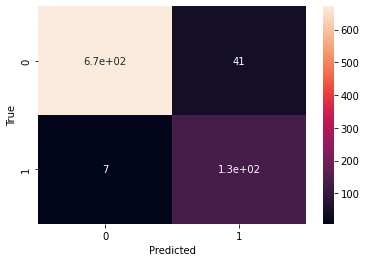

In [472]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [473]:
f1_score(test["TenYearCHD"],test["Prediction"], pos_label=1) 

0.8431372549019607

In [474]:
f1_score(test["TenYearCHD"],test["Prediction"], pos_label=0) 

0.9654676258992805

**jaccard score**

In [475]:
jaccard_score(test["TenYearCHD"],test["Prediction"],pos_label=1)

0.7288135593220338

In [476]:
jaccard_score(test["TenYearCHD"],test["Prediction"],pos_label=0)

0.933240611961057

**final accuracy**

In [477]:
accuracy_score(test["TenYearCHD"],test["Prediction"])

0.9433962264150944